# HW 2 due May 5th at 11:55 PM (but you may turn in without penalty until May 10th @ 11:55PM - need time to grade)

# CS 360

Please comment all code (I have no problem with over-zealous commenting although I will tell you if I feel you are going above the call of the duty)

### Instructions
0. Remember to comment.  If your code fails to perform the task at hand but your comments are describing proper code execution I can award a substanial amount of points for logical errors in your program.  Think of comments as the equivalent of showing your work in a math class.
1. Read all instructions carefully, ask questions if anything is confusing.  
2. Fill in the code/text blocks to answer each question.
3. Do **not** change any of the existing code provided.  The code is specifically there to help you!
4. Run the entire notebook *before* submitting it on Sakai to make sure that the code actually runs without errors.
5. **Important**: Any question for which your code fails to run will receive 0 points.
6. Have fun!
7. DO NOT USE ANY PACKAGES, other than the ones I have imported.  Part of learning is to struggle through the "hard way" before getting to do things the easy way.  Any packages I have imported are fair game and you may use any functions unless otherwise specified.  If I've imported them after a function, I've deliberately made it so you cannot retroactively use them in an earlier problem.
8. If I've used return(None) for a function, you may definitely change the return type.  It's just a placeholder
9. While you may discuss the concepts of the problems with your peers your code will need to be yours and yours alone.
10. Name your file yourBUNETID_hw3.  For example: dbrennan_hw3 would be mine.

In [5]:
##You may not import anything for this assignment, all accuracy metrics are left to you as exercises!
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import random as random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [6]:
## Read the csv off web, no attached file needed!
iris_data=pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Part 1 (10 points)

This is for the existing KNNClassifier we have used before

Create a train test split using 80/20 for train/test respectively

Cross validate the training data with 5 folds (you may shortcut from lab5 by using cross val score)

documentation how to use is found at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Find the highest performing k, make a note of that as a comment after your code

THEN:

Predict on test data k=1->20, see where optimum accuracy is

What did you notice?

Plot it out number of neighbors vs accuracy

Also produce a confusion matrix (does not have to be from scratch, can use seaborn)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]], dtype=int64)

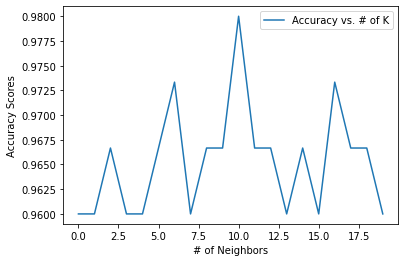

In [7]:
#setting our target array
X = iris_data.drop(columns = ["species"])
target = iris_data["species"].values

#empty list for finding optimum K value
scoreos = []

#using test_train_split and getting our test/training data
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size = .2,
                                                        random_state = 69)

#this is a loop to find our best performing k
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X=X_train, y=target_train)
    kfold = KFold(n_splits = 5, random_state = 69, shuffle = True)
    scoreos.append(cross_val_score(estimator=knn, X=X, y=target, cv=kfold))
                  
#LC to sum the arrays with their scores after the 5-Kfold cross-val
#if you uncomment the enumerate you'll see that we get the highest performing k values
#at k = 8,11,13,14,15, which all cap out at the same value: .9800000000000001
total_avg = [sum(i)/5 for i in scoreos]                 
#for idx,val in enumerate(total_avg):
    #print(idx,val)
    
#plotting our accuracy vs number of neighbors
plt.plot(total_avg, label = "Accuracy vs. # of K")
plt.xlabel("# of Neighbors")
plt.ylabel("Accuracy Scores") 
plt.legend()
predicted = knn.predict(X=X_test)
expected = target_test
#confusion matrix
confusion = confusion_matrix(y_true = expected, y_pred = predicted)
confusion

#looking at it, we only see three rows, and three columns.
#this might look underwhelming but think of our data! we're trying to correctly predict
#a sub-species of IRIS plants I believe, and there are only 3 of those sub-species
#so there is a 3x3 matrix created. 

## Part 2 (90 points)

Build KNN from scratch, I recommend an OOP approach but the choice is yours in how you structure it.  You'll be doing the same exact thing as above.  Make sure you can handle manhattan (p=1) or euclidian (p=2), and of course the number of neighbors.  You should be able to clearly document how to use your KNN classifier and I should be able to run it on euclidian and taxicab distance!

algorithm="brute" in the sklearn documentation is merely forcing the algorithm to run through a brute force performance, as opposed to using intelligent structures like heaps to speed up the execution.  We want to be able to compare timing to similar algorithms!  For this reason, do not worry about coding any tree-like structures up to save time.  This will consume coding time!  Although your algorithm will not be optimal, that is perfectly fine!  If you are interested in creating efficient machine learning algorithms from scratch you'll have those opportunities in life!

Couple quick assumptions:

your data contains d classes where d >= 2

your data contains n dimensions where n >= 1

**This is to say do not hardcore to merely be able to handle a single feature, and you also must be able to handle a n-ary output class (as opposed to merely Binary)**

For testing, run the IRIS dataset through your classifier and should benchmark against that.  

I hope this is somewhat enlightening, coding many of the algorithms we use from scratch is a great opportunity to discect and learn how they operate.  I'll leave it to the industry experts who can certainly produce more efficient versions of these algorithms if I want high speed.

If you have questions, I'm guessing you are joined by your classmates post on piazza, but do NOT post your personal code.  Make sure all questions are generic enough.

**How to handle ties in this class:
Strategy for k with an even number of neighbors, decrease k by one until a majority decision is reached
his HAS to happen at k=1 or before (since k=1 cannot "tie"), you might consider a recursive approach!
Lots of creative opportunities to handle this in other cases (increase k, look at weights, randomly choose, etc) but we will
standardize our approach to decrementing k
If we were working with binary classified data (+,-), (stolen,not_stolen) etc we could merely just use k=odd to bypass this**

Strategy for k with an even number of neighbors, decrease k by one until a majority decision is reached.  This HAS to happen at k=1 or before (since k=1 cannot "tie"), you might consider a recursive approach.  Lots of creative opportunities to handle this in other cases if we didn't want to decrease our k for a prediction (increase k, look at weights, etc) but we will standardize our approach.  If we were working with binary classified data (+,-), (stolen,not_stolen) etc we could merely just use k=odd to bypass this.

After your classifier is built, repeat the same steps from part 1 using your custom classifier.

**Advice on this assignment: get stuck early, get unstuck early.  This may not take as long as assignment 1 but if you wait until the last minute here you run the risk of not having enough time to get the help you need**

You might find these useful for coding:

**np.argsort**

**recursion**

# **To test your code early on I recommend doing this:**

Fit your model on the entire data set.  It will have all of your data stored in it.

Choose k = 1 for your neighbors.  Choose either euclidian or manhattan for your distance metric, doesn't matter.

Have your model then predict the entire data set.  Mathematically, every single data point is in your model so for each point you are trying to predict it should find that it is closest to point itself with a distance of 0.  Your accuracy should thus be 100%.  If you cannot get this far, go back and try to debug what isn't working correctly.



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#data preparation
data = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
col_to_drop = data.columns[data.shape[1]-1]
X = data.drop(columns = [col_to_drop])
y = data[col_to_drop].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2,
                                                        random_state = 69)


In [94]:
## Skeleton code for your KNN classifier
from scipy.spatial import distance

class knn_cs360(object):
    
    ## Our "Constructor" for the class
    def __init__(self,num_neighbors,distance_metric):
        self._neighbor = num_neighbors
        self._distance = distance_metric
    
    ## Giving KNN object the data
    def fit(self,x_data_inputted,y_data_inputted):
        self._x_data = np.array(x_data_inputted)
        self._y_data = np.array(y_data_inputted)
    
    ## The function that causes everything else to work, predict is going to call get_neighbors
    ## so it is able to make a prediction, which it can't do without knowing the neighbors to look at
    def predict(self,x_test):
        x_test = np.array(x_test)
        predictions = []
        if len(x_test.shape) == 1:
            return self.get_neighbors(x_test)
        for i in range(x_test.shape[0]):  
            predictions.append(self.get_neighbors(x_test[i]))
        return predictions
    
    ## We're working with arrays here that could be very massive, so we need an efficient way of 
    ## obtaining all of their distances, our class is written to handle euclidian distance which is 
    ## a straight line, and it also handles manhattan or cityblock distance (90 degree turns no straight lines)
    def distance_calculation(self,arr1,arr2):
        
        # euclidian distance calculation
        if self._distance == "euclid":
            dst = distance.euclidean(arr1,arr2)
            return dst
        ## manhattan distance calculation
        else:
            dst = distance.cityblock(arr1,arr2)
            return dst
         
    ## Let's unpack this, so get_neighbors is going to go through and find the distances from all other points
    ## in the data, and then is going to sort those distances while still keeping the classification metric
    ## (most likely a string) still tethered to those distances. After they get sorted, we need to obtain the 
    ## "K" highest scorers, and then pass those scorers to the vote function.
    def get_neighbors(self,single_pt):
        temp_neighbor = self._neighbor
        temp_y = self._y_data
        distances = []
        for i in range(len(self._x_data)):
            temp_distance = self.distance_calculation(single_pt, self._x_data[i])
            distances.append((temp_distance, temp_y[i]))
        distances.sort(key=lambda f: f[0])
        candidates = distances[:temp_neighbor] 
        return (self.vote(candidates))
    
    ## Vote will of course "vote" on the number of classifiers, so we use a dictionary to get their counts,
    ## however a dictionary isn't good for data minipulation so we will throw it straight into a list,
    ## and then sort on the counts, after we sort we need to extract our first value of the sorted
    ## list because that will be our max, then we check if that max value occurs in the list again
    ## it would obvioulsy be 2nd in line since we sorted, but ties are always possible, so in the loop
    ## at the bottom we see that if the top value is inside the list again, we recall the ENTIRE class with "K"
    ## being decremented. This step will redo the entire algorithm. Lastly once we find our highest vote, we will
    ## return that classifier, which will return to get_neighbors(), which returns to predict().
    def vote(self,candidates):
        if len(candidates) == 1:
            return (candidates[0][1])
        dc = {}
        for i in candidates:
            if i[1] in dc:
                dc[i[1]] += 1
            else:
                dc[i[1]] = 1
      
        temp = dc.items()
        dc_list = list(temp)
        dc_list.sort(key = lambda f: f[1], reverse = True)      
        top_val = dc_list[0][1]
        
        for i in dc_list[1:]:
            if i[1] == top_val:
                candidates.pop()
                return(self.vote(candidates))
        predicted_classification = dc_list[0][0]
        return (predicted_classification)

In [78]:
knn = knn_cs360(7,"euclid")
fit = knn.fit(X_train,y_train)
predict = knn.predict(X_train)
expected = y_test

for i,j in zip(predict,expected):
    if i != j:
        print("Predicted: " + i + "; Expected: " + j)
if predict == list(expected):
    print("Algorithm is 100% accurate!")

Predicted: setosa; Expected: versicolor
Predicted: virginica; Expected: setosa
Predicted: virginica; Expected: setosa
Predicted: setosa; Expected: versicolor
Predicted: versicolor; Expected: virginica
Predicted: versicolor; Expected: virginica
Predicted: virginica; Expected: setosa
Predicted: setosa; Expected: virginica
Predicted: versicolor; Expected: setosa
Predicted: setosa; Expected: versicolor
Predicted: versicolor; Expected: virginica
Predicted: virginica; Expected: versicolor
Predicted: versicolor; Expected: virginica
Predicted: setosa; Expected: versicolor
Predicted: versicolor; Expected: setosa
Predicted: virginica; Expected: setosa
Predicted: virginica; Expected: setosa
Predicted: versicolor; Expected: virginica
Predicted: setosa; Expected: virginica
Predicted: versicolor; Expected: setosa


In [79]:
import pandas as pd
tie_test = pd.read_csv("tiebreaker.csv")
tie_test.head()

,X1,X2,X3,Y
0,1,1,1,square
1,2,2,2,triangle
2,3,3,3,circle
3,4,4,4,triangle
4,5,5,5,circle


In [95]:
y_data = tie_test["Y"]
x_data=tie_test.drop("Y",axis=1)


## Use all 5 neighbors
myknn = knn_cs360(num_neighbors=5,distance_metric="euclid")
myknn.fit(x_data_inputted=x_data,y_data_inputted=y_data)
assert(myknn.predict([6,6,6])=="circle")
assert(myknn.predict([0,2,1])=="triangle")

## 4 Neighbors tricky case
myknn = knn_cs360(num_neighbors=4,distance_metric="manhattan")
myknn.fit(x_data_inputted=x_data,y_data_inputted=y_data)
assert(myknn.predict([4,3,4])=="circle")

## Start with 3 neighbors
myknn = knn_cs360(num_neighbors=3,distance_metric="euclid")
myknn.fit(x_data_inputted=x_data,y_data_inputted=y_data)
assert(myknn.predict([-1,-1,-1])=="square")
assert(myknn.predict([2,3,2])=="triangle")
assert(myknn.predict([6,6,6])=="circle")

## 2 neighbors this time
myknn = knn_cs360(num_neighbors=2,distance_metric="euclid")
myknn.fit(x_data_inputted=x_data,y_data_inputted=y_data)
assert(myknn.predict([1,2,1])=="square")
assert(myknn.predict([2,3,2])=="triangle")
assert(myknn.predict([3,4,3])=="circle")
assert(myknn.predict([4,5,4])=="triangle")
assert(myknn.predict([5,6,5])=="circle")

## Slide to the left...I mean 1 neighbor this time
myknn = knn_cs360(num_neighbors=1,distance_metric="euclid")
myknn.fit(x_data_inputted=x_data,y_data_inputted=y_data)
assert(myknn.predict([1,2,1])=="square")
assert(myknn.predict([2,3,2])=="triangle")
assert(myknn.predict([3,4,3])=="circle")
assert(myknn.predict([4,5,4])=="triangle")
assert(myknn.predict([5,6,5])=="circle")

In [93]:
myknn.predict([-1,-1,-1])

[(3.4641016151377544, 'square')]


'square'